In [ ]:
import matplotlib
import matplotlib.pyplot as plt
!pip install -q git-Repo
from git import Repo
import numpy as np
import os
from os.path import join
import pandas as pd
from pandas import read_csv
# from shutil import rmtree
# from tempfile import mkdtemp
import io
import requests
import datetime

# ita_complete = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")

     |████████████████████████████████| 51kB 2.3MB/s 
     |████████████████████████████████| 163kB 9.4MB/s 
     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 112kB 10.1MB/s 
     |████████████████████████████████| 102kB 6.3MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 133kB 12.4MB/s 


In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ita_complete = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dpc-covid19-ita-andamento-nazionale.csv")
# ita_complete.head(10)

In [ ]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/dataset.xlsx")
data.rename(columns={'totale_positivi':'total_positives', 'nuovi_positivi':'new_positives', 'deceduti':'deaths'}, inplace=True)
data.head(10)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
# data_date_cases_deaths=data[["date","totale_casi","deceduti"]]
# data_date_cases_deaths.rename(columns={'totale_casi':'total_cases', 'deceduti':'deaths'}, inplace=True)
# data_date_cases_deaths.head(10)

In [ ]:
date_time = pd.to_datetime(data.pop('date'), format='%Y-%m-%d')

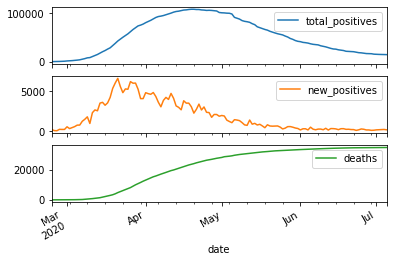

In [ ]:
plot_cols = ['total_positives', 'new_positives', 'deaths']
plot_features = data[plot_cols]
plot_features.index = date_time
_=plot_features.plot(subplots=True)

In [ ]:
# Plot the number of total cases
#fig, ax = plt.subplots()
#ax.plot(data.total_cases)
#ax.set_title('Number of total cases')

In [ ]:
# Plot the number of deaths
#fig, ax = plt.subplots()
#ax.plot(data.deaths)
#ax.set_title('Number of deaths')

Text(0.5, 0, 'days: from 24-feb to 5-july')

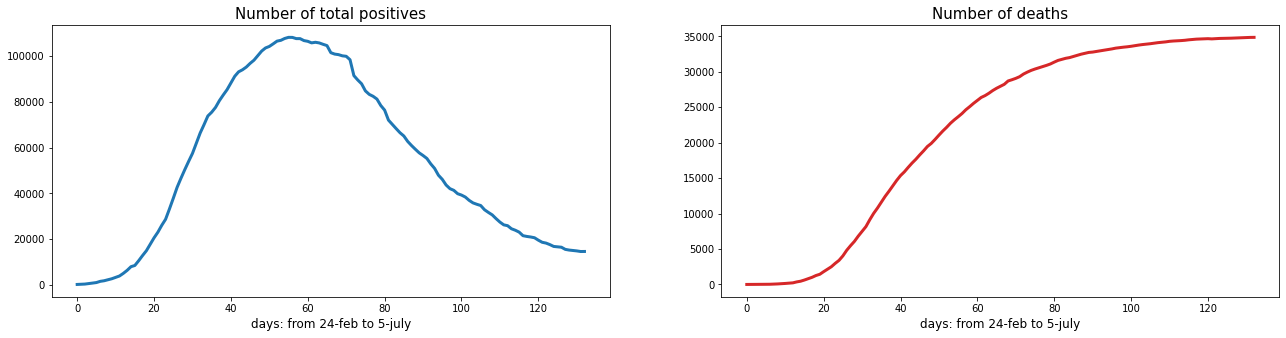

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22,5))
ax1.plot(data.total_positives, linewidth=3)
ax1.set_title('Number of total positives', fontsize=15)
ax2.plot(data.deaths, 'tab:red', linewidth=3)
ax2.set_title('Number of deaths', fontsize=15)
ax1.set_xlabel('days: from 24-feb to 5-july', fontsize=12)
ax2.set_xlabel('days: from 24-feb to 5-july', fontsize=12)

In [ ]:
CASES = np.array(data.loc[:, "total_positives"])[:30]

In [ ]:
# We use this function to produce training data with given input step (output step=1)
# LAG = 1

def extract_sample(series):
    X = []
    Y = []
    for i in range(len(series)-1):
        X.append(series[i:i+1])
        Y.append(series[i+1])
    return X, Y
 
# Training sets for both series: we separate input (x) from output (y) data
X_CASES, Y_CASES = extract_sample(CASES)
X_CASES, Y_CASES
n_input= np.array(X_CASES).shape[1]

In [ ]:
# for lag = 2

def extract_sample(series):
    X = []
    Y = []
    for i in range(len(series)-2):
        X.append(series[i:i+2])
        Y.append(series[i+2])
    return X, Y
 
# Training sets for both series: we separate input (x) from output (y) data
X_CASES, Y_CASES = extract_sample(CASES)
X_CASES, Y_CASES
n_input= np.array(X_CASES).shape[1]

In [ ]:
# for lag = 3

def extract_sample(series):
    X = []
    Y = []
    for i in range(len(series)-3):
        X.append(series[i:i+3])
        Y.append(series[i+3])
    return X, Y
 
# Training sets for both series: we separate input (x) from output (y) data
X_CASES, Y_CASES = extract_sample(CASES)
X_CASES, Y_CASES
n_input= np.array(X_CASES).shape[1]

In [ ]:
# for lag = 5

def extract_sample(series):
    X = []
    Y = []
    for i in range(len(series)-5):
        X.append(series[i:i+5])
        Y.append(series[i+5])
    return X, Y
 
# Training sets for both series: we separate input (x) from output (y) data
X_CASES, Y_CASES = extract_sample(CASES)
X_CASES, Y_CASES
n_input= np.array(X_CASES).shape[1]

In [ ]:
# for eventually differenced data

def difference(s):
    return [s[i+1] - s[i] for i in range(len(s)-1)]
 
def cumulated(s0, d):
    # cumulated(s[0], difference(s)) == s
    s = [s0]
    for i in range(len(d)):
        s.append(s[i] + d[i])
    return s
 
D_CASES = difference(CASES)
plt.plot(D_CASES)

In [ ]:
# for lag = 2 differenced

def extract_sample(series):
    X = []
    Y = []
    for i in range(len(series)-2):
        X.append(series[i:i+2])
        Y.append(series[i+2])
    return X, Y
 
# Training sets for both series: we separate input (x) from output (y) data
DX_CASES, DY_CASES = extract_sample(D_CASES)
n_input= np.array(DX_CASES).shape[1]

In [ ]:
# scaled and differenced data

def scaling(s, a = -1, b = 1):
    m = min(s)
    M = max(s)
    scale = (b - a)/(M - m)
    return a + scale * (s - m)
 
DS_CASES = scaling(difference(CASES))
plt.plot(DS_CASES)

In [ ]:
# for lag = 5

def extract_sample(series):
    X = []
    Y = []
    for i in range(len(series)-5):
        X.append(series[i:i+5])
        Y.append(series[i+5])
    return X, Y
 
# Training sets for both series: we separate input (x) from output (y) data
DSX_CASES, DSY_CASES = extract_sample(DS_CASES)
n_input= np.array(DSX_CASES).shape[1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
 

def train_test(neural_network, X, Y, epochs=2000, training_percent_size = 0.66):
    # This function takes a dataset, splits it into training and testing sets
    # according to training_percent_size, trains a plain LSTM model on it
    # launches preditions on datasets, and plots the result.
    N = len(X)
    # Extract training and testing samples and convert in numpy arrays
    n_training = int(N*training_percent_size)
    X_TRAINING, Y_TRAINING = np.array(X[:n_training]), np.array(Y[:n_training])
    X_TESTING, Y_TESTING = np.array(X[n_training:]), np.array(Y[n_training:])
    # neural_network.fit expect a (samples, input-steps, output-steps) shaped X array
    X_TRAINING = X_TRAINING.reshape((X_TRAINING.shape[0], X_TRAINING.shape[1], 1))
    X_TESTING = X_TESTING.reshape((X_TESTING.shape[0], X_TESTING.shape[1], 1))
    # Training: shuffle=False prevents data shuffling, order is important! 
    for i in range(epochs):
        neural_network.fit(X_TRAINING, Y_TRAINING, epochs = 1, verbose = 0, shuffle = False, batch_size=16)
        neural_network.reset_states()
    Y_PREDICTED = []    # we list predictions in this array
    for x in X_TESTING:
        x = x.reshape((1, n_input, 1))
        y = neural_network.predict(x, verbose = 0)
        Y_PREDICTED.append(y[0][0])
    # Plot data in read and predictions in blue
    plt.plot(Y, 'b')
    plt.plot(range(n_training, N), Y_PREDICTED, 'r')
    plt.show()
    # Test loss
    print("Loss (MSE) =", np.linalg.norm(Y_TESTING - np.array(Y_PREDICTED))**2/len(Y_TESTING))
    print("RMSE", math.sqrt(np.linalg.norm(Y_TESTING - np.array(Y_PREDICTED))**2/len(Y_TESTING)))
    # The curve with prediction instead of testing values is returned
    return np.concatenate((Y_TRAINING, Y_PREDICTED))

In [ ]:
nn2 = Sequential()
nn2.add(LSTM(32, activation = "relu", input_shape = (n_input, 1), return_sequences=True))
nn2.add(LSTM(32, activation = "relu"))
nn2.add(Dense(1))  # the layer has a 1-dimensional output (a number)
nn2.compile(loss="mean_squared_error", optimizer="adam")


prediction = train_test(nn2, X_CASES, Y_CASES)

In [ ]:
prediction

training on differenced data

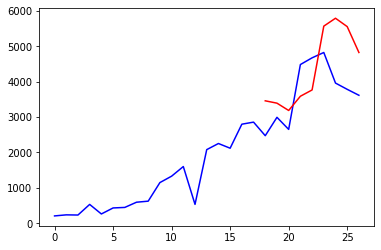

Loss (MSE) = 1283749.1551537248
RMSE 1133.0265465353073
Loss = 689012180.0280625
RMSE 26249.041506844824


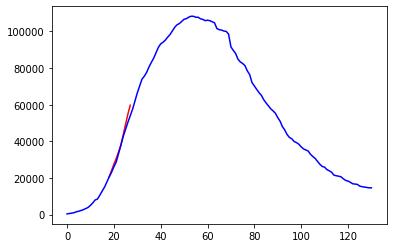

In [ ]:
nn2 = Sequential()
nn2.add(LSTM(32, activation = "relu", input_shape = (n_input, 1), return_sequences=True))
nn2.add(LSTM(32, activation = "relu"))
nn2.add(Dense(1))  # the layer has a 1-dimensional output (a number)
nn2.compile(loss="mean_squared_error", optimizer="adam")

# prediction on differenced data

d_prediction = train_test(nn2, DX_CASES, DY_CASES)
 
# We plot also the actual series
prediction = cumulated(Y_CASES[0], d_prediction)

plt.plot([None for i in Y_CASES[:18]] + [x for x in prediction[18:]], 'r')
plt.plot(Y_CASES, 'b')

print("Loss =", np.linalg.norm(Y_CASES[-10:] - np.array(prediction[-10:]))**2/len(Y_CASES[-10:]))
print("RMSE", math.sqrt(np.linalg.norm(Y_CASES[-10:] - np.array(prediction[-10:]))**2/len(Y_CASES[-10:])))

In [ ]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
expected=Y_CASES[20:29]
predictions = prediction[-9:]

# forecast errors
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
#print('Forecast Errors:',forecast_errors)

# forecast bias (mean forecast error)
mean_forecast_error = np.mean(forecast_errors)
print('Mean Forecast Error (Bias) : %.4f' % mean_forecast_error)

# mean absolute error (MAE)
#mean_absolute_error = np.mean(np.abs(forecast_error))
mean_absolute_error = sklearn.metrics.mean_absolute_error(expected, predictions)
print("Mean Absolute Error (MAE) : %.4f"% mean_absolute_error)

# mean squared error (MSE)
mse = np.linalg.norm(Y_CASES[-10:] - np.array(prediction[-10:]))**2/len(Y_CASES[-10:])
print('Mean Squared Error (MSE): %.4f' % mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) : %.4f' % rmse)

# R-squared
r2=r2_score(expected, predictions)
print('R-squared (R^2) : %.4f' % r2)

# Correlation r
r=np.corrcoef(predictions, expected)
print("Correlation : %.4f" % r[0,1])

# MAPE - Mean Absolute Percentage Error
def mean_absolute_percentage_error(expected, predictions): 
    expected, predictions = np.array(expected), np.array(predictions)
    return np.mean(np.abs((expected - predictions) / expected)) * 100
print("Mean Absolute Percentage Error (MAPE) : %.4f"% mean_absolute_percentage_error(expected, predictions))